## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

<div class="alert alert-info"><h3>Related Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Seasonal decomposition using moving averages</tt>
<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Innovations state space models for exponential smoothing</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposition of time series</font></div>

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#df = pd.read_csv('https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/TimeSeries/Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/TimeSeries/Data/airline_passengers.csv')

In [63]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [65]:
df = df.set_index('Month')

In [66]:
df.index = pd.to_datetime(df.index)

In [67]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


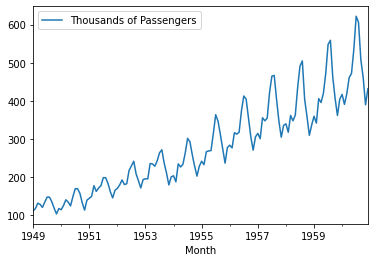

In [69]:
df.plot()

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')  # model='mul' also works

In [71]:
result

In [72]:
#result.plot()

[]

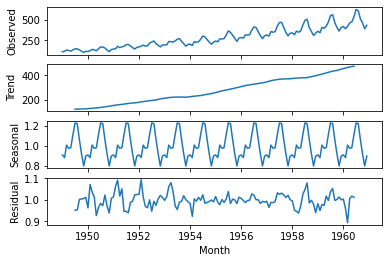

In [73]:
# using the variable ax for single a Axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(df.index, result.observed)
ax1.set_ylabel('Observed')

ax2.plot(df.index, result.trend)
ax2.set_ylabel('Trend')

ax3.plot(df.index, result.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(df.index, result.resid)
ax4.set_ylabel('Residual')

plt.xlabel('Month')
plt.plot()